# ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í¥ÄÏÉÅ ÏÉùÏÑ±ÌïòÍ∏∞

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÏÑùÌïòÏó¨ Í¥ÄÏÉÅÏùÑ ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Îã§ÏùåÍ≥º Í∞ôÏùÄ 2Îã®Í≥Ñ ÌîÑÎ°úÏÑ∏Ïä§Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§:

1. **ÏñºÍµ¥ Î∂ÑÏÑù**: Amazon BedrockÏùò Nova Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏñºÍµ¥ ÌäπÏßïÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.
2. **Í¥ÄÏÉÅ ÏÉùÏÑ±**: Î∂ÑÏÑùÎêú ÏñºÍµ¥ ÌäπÏßïÏùÑ Í∏∞Î∞òÏúºÎ°ú Í¥ÄÏÉÅÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.

## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install boto3 pillow matplotlib

Defaulting to user installation because normal site-packages is not writeable


## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [2]:
import boto3
import json
import os
import pprint
from PIL import Image
import matplotlib.pyplot as plt
from botocore.exceptions import ClientError
import logging
import base64
from io import BytesIO
from IPython.display import display, HTML, Markdown

# Î°úÍπÖ ÏÑ§Ï†ï
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

## AWS ÏûêÍ≤© Ï¶ùÎ™Ö ÌôïÏù∏

In [3]:
# AWS ÏûêÍ≤© Ï¶ùÎ™ÖÏù¥ Ïò¨Î∞îÎ•¥Í≤å ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏
try:
    boto3.client('sts').get_caller_identity()
    print("‚úÖ AWS ÏûêÍ≤© Ï¶ùÎ™ÖÏù¥ Ïò¨Î∞îÎ•¥Í≤å ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏäµÎãàÎã§.")
except Exception as e:
    print("‚ùå AWS ÏûêÍ≤© Ï¶ùÎ™Ö ÏÑ§Ï†ïÏóê Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§.")
    print(f"Ïò§Î•ò Î©îÏãúÏßÄ: {e}")
    print("AWS CLIÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 'aws configure' Î™ÖÎ†πÏúºÎ°ú ÏûêÍ≤© Ï¶ùÎ™ÖÏùÑ ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.")

INFO:botocore.credentials:Found credentials from IAM Role: vscode-on-ec2-CodeServerInstanceBootstrapRole-ZnimVDAk9q8X


‚úÖ AWS ÏûêÍ≤© Ï¶ùÎ™ÖÏù¥ Ïò¨Î∞îÎ•¥Í≤å ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏäµÎãàÎã§.


## Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è ÌëúÏãú Ìï®Ïàò

In [4]:
def load_and_display_image(image_path):
    """Ïù¥ÎØ∏ÏßÄÎ•º Î°úÎìúÌïòÍ≥† ÌëúÏãúÌïòÎäî Ìï®Ïàò"""
    img = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ')
    plt.show()
    return img

## Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è Ïù¥ÎØ∏ÏßÄ ÌëúÏãú

/home/participant/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/participant/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/participant/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/participant/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/participant/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from fo

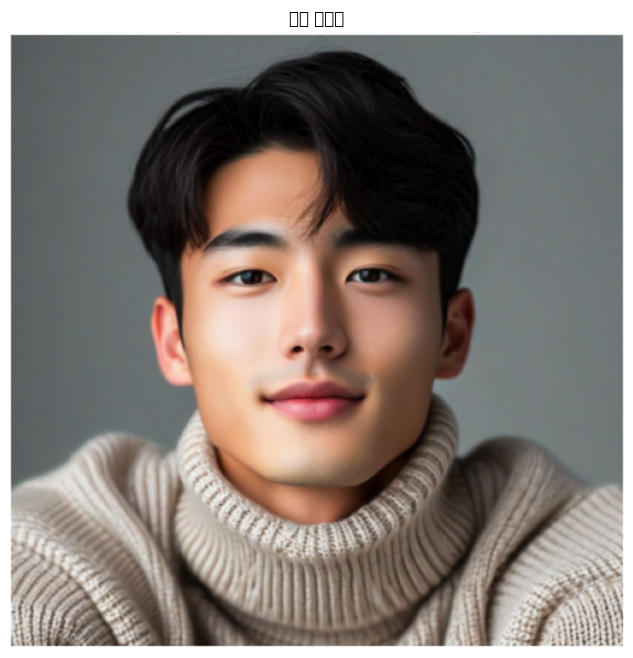

In [5]:
# ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï
image_path = "sample/sample_face.png"

# Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è ÌëúÏãú
img = load_and_display_image(image_path)

## 1Îã®Í≥Ñ: ÏñºÍµ¥ Î∂ÑÏÑù Ìï®Ïàò Íµ¨ÌòÑ (Nova Î™®Îç∏ ÏÇ¨Ïö©)

In [6]:
def analyze_face(image_path):
    """
    ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÏÑùÌïòÏó¨ ÌäπÏßïÏùÑ Ï∂îÏ∂úÌïòÎäî Ìï®Ïàò (Nova Î™®Îç∏ ÏÇ¨Ïö©)
    """
    # Î™®Îç∏ ID ÏÑ§Ï†ï - Nova Lite Î™®Îç∏
    model_id = "us.amazon.nova-lite-v1:0"
    
    # Ïù¥ÎØ∏ÏßÄÎ•º base64Î°ú Ïù∏ÏΩîÎî©
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    
    # Bedrock ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
    bedrock_runtime = boto3.client('bedrock-runtime', region_name='us-east-1')
    
    # ÌîÑÎ°¨ÌîÑÌä∏ ÏûëÏÑ±
    system_prompt = "ÎãπÏã†ÏùÄ ÏñºÍµ¥Ïóê ÎåÄÌï¥ÏÑú Î∂ÑÏÑùÌïòÎäî AI ÏûÖÎãàÎã§. ÏñºÍµ¥Ïóê ÎåÄÌïú Î∂ÑÏÑùÍ≥º ÌïµÏã¨ ÌÇ§ÏõåÎìúÎ•º Ï∂îÏ∂úÌïòÎäî Í≤ÉÏù¥ Ïó≠Ìï†ÏûÖÎãàÎã§. Î™®Îì† Ï∂úÎ†•Ïùò ÎÇ¥Ïö©Ïóê ÏñºÍµ¥Ïóê ÎåÄÌïú Î∂ÄÏ†ïÏ†ÅÏù∏ ÎÇ¥Ïö©ÏùÄ Îã¥ÏßÄ ÏïäÏäµÎãàÎã§."
    
    user_prompt = """
Ïù¥ ÏÇ¨ÏßÑ ÏÜç Ïù∏Î¨ºÏùò ÏñºÍµ¥Ïóê ÎåÄÌï¥ÏÑú ÏïÑÎûò ÏöîÏÜåÎì§ÏùÑ ÏÉÅÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥ÏÑú <description> ÌÉúÍ∑∏ ÏïàÏóê ÏÑúÏà†ÌòïÏúºÎ°ú ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

- ÏñºÍµ¥Ìòï (Îë•Í∑ºÌòï, Í≥ÑÎûÄÌòï, Í∞ÅÏßÑÌòï Îì±)
- ÎààÏùò ÌäπÏßï (ÌÅ¨Í∏∞, Î™®Ïñë, ÏåçÍ∫ºÌíÄ Ïú†Î¨¥ Îì±)
- ÏΩîÏùò ÌäπÏßï (Í∏∏Ïù¥, Î™®Ïñë, ÏΩßÎåÄ ÎÜíÏù¥ Îì±)
- ÏûÖÏà†Ïùò ÌäπÏßï (ÎëêÍªò, Î™®Ïñë, ÌäπÏù¥Ï†ê Îì±)
- ÌîºÎ∂Ä ÌäπÏßï (ÌîºÎ∂ÄÌÜ§, ÌäπÏù¥Ï†ê Îì±)
- ÌäπÎ≥ÑÌûà ÎèÑÎìúÎùºÏßÄÎäî ÏñºÍµ¥ ÌäπÏßïÏù¥ÎÇò ÌëúÏ†ï
- Ìó§Ïñ¥Ïä§ÌÉÄÏùº (Í∏∏Ïù¥, Ïª¨Îü¨, Ïä§ÌÉÄÏùº Îì±)

Í∑∏Î¶¨Í≥† ÌïµÏã¨ ÌÇ§ÏõåÎìú 10Í∞úÎ•º Ï∂îÏ∂úÌï¥ÏÑú <keywords> ÌÉúÍ∑∏ ÏïàÏóê ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
"""
    
    try:
        # ÏãúÏä§ÌÖú ÌîÑÎ°¨ÌîÑÌä∏ ÏÑ§Ï†ï
        system_list = [
            {
                "text": system_prompt
            }
        ]
        
        # ÏÇ¨Ïö©Ïûê Î©îÏãúÏßÄ ÏÑ§Ï†ï (Ïù¥ÎØ∏ÏßÄ Ìè¨Ìï®)
        message_list = [
            {
                "role": "user",
                "content": [
                    {
                        "image": {
                            "format": "png",
                            "source": {
                                "bytes": encoded_string
                            }
                        }
                    },
                    {
                        "text": user_prompt
                    }
                ]
            }
        ]
        
        # Ï∂îÎ°† ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
        inf_params = {"maxTokens": 1000, "temperature": 0.3}
        
        # ÏöîÏ≤≠ Î≥∏Î¨∏ Íµ¨ÏÑ±
        native_request = {
            "schemaVersion": "messages-v1",
            "messages": message_list,
            "system": system_list,
            "inferenceConfig": inf_params
        }
        
        # API ÏöîÏ≤≠
        response = bedrock_runtime.invoke_model(
            modelId=model_id, 
            body=json.dumps(native_request)
        )
        
        # ÏùëÎãµ Ï≤òÎ¶¨
        model_response = json.loads(response["body"].read())
        result_text = model_response["output"]["message"]["content"][0]["text"]
        
        print("\nÏñºÍµ¥ Î∂ÑÏÑù Í≤∞Í≥º:")
        print(result_text)
        
        return result_text

    except ClientError as err:
        message = err.response['Error']['Message']
        logger.error("A client error occurred: %s", message)
        print(f"ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ïò§Î•ò Î∞úÏÉù: {message}")
        return None

## ÏñºÍµ¥ Î∂ÑÏÑù Ïã§Ìñâ

In [7]:
# ÏñºÍµ¥ Î∂ÑÏÑù Ïã§Ìñâ
face_analysis = analyze_face(image_path)


ÏñºÍµ¥ Î∂ÑÏÑù Í≤∞Í≥º:
<description>
Ïù¥ ÏÇ¨ÏßÑ ÏÜç Ïù∏Î¨ºÏùò ÏñºÍµ¥ÏùÄ Í≥ÑÎûÄÌòïÏúºÎ°ú, ÏñºÍµ¥Ïùò Ï†ÑÏ≤¥Ï†ÅÏù∏ Í∏∏Ïù¥Î≥¥Îã§ ÎÑìÏù¥Í∞Ä Îçî ÎöúÎ†∑Ìï©ÎãàÎã§. ÎààÏùÄ Ï§ëÍ∞Ñ ÌÅ¨Í∏∞Î°ú, Î™®ÏñëÏùÄ ÌÉÄÏõêÌòïÏù¥Î©∞ ÏåçÍ∫ºÌíÄÏù¥ ÏóÜÏäµÎãàÎã§. ÏΩîÎäî Ï§ëÍ∞Ñ Í∏∏Ïù¥Î°ú, ÏΩßÎåÄÎäî ÎÜíÏßÄ ÏïäÍ≥† ÏûêÏó∞Ïä§ÎüΩÍ≤å ÏúÑÏπòÌï¥ ÏûàÏäµÎãàÎã§. ÏûÖÏà†ÏùÄ Ï§ëÍ∞Ñ ÎëêÍªòÎ°ú, Î™®ÏñëÏùÄ ÏûêÏó∞Ïä§ÎüΩÍ≤å ÏõÉÍ≥† ÏûàÏñ¥ ÏûÖÏà†Ïùò Î™®ÏñëÏù¥ Ïûò ÎìúÎü¨ÎÇòÏßÄ ÏïäÏäµÎãàÎã§. ÌîºÎ∂ÄÌÜ§ÏùÄ Î∞ùÍ≥† Í∑†ÏùºÌïòÎ©∞, ÌäπÏù¥Ìïú Ìù†ÏßëÏù¥ÎÇò ÏñºÎ£©ÏùÄ ÏóÜÏäµÎãàÎã§. ÌäπÎ≥ÑÌûà ÎèÑÎìúÎùºÏßÄÎäî ÏñºÍµ¥ ÌäπÏßïÏù¥ÎÇò ÌëúÏ†ïÏùÄ ÏóÜÏúºÎ©∞, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏûêÏó∞Ïä§ÎüΩÍ≥† ÏÉÅÌÅºÌïú Ïù∏ÏÉÅÏùÑ Ï§çÎãàÎã§. Ìó§Ïñ¥Ïä§ÌÉÄÏùºÏùÄ ÏßßÏùÄ Í∏∏Ïù¥Î°ú, ÏÉâÏÉÅÏùÄ Í≤ÄÏùÄÏÉâÏù¥Î©∞ Ïä§ÌÉÄÏùºÏùÄ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïñ¥Íπ®ÍπåÏßÄ ÎÇ¥Î†§Ïò® ÏïûÎ®∏Î¶¨Í∞Ä ÌäπÏßïÏ†ÅÏûÖÎãàÎã§.
</description>
<keywords>
Í≥ÑÎûÄÌòï, ÌÉÄÏõêÌòï Îàà, Ï§ëÍ∞Ñ Í∏∏Ïù¥ ÏΩî, ÏûêÏó∞Ïä§Îü¨Ïö¥ ÏûÖÏà†, Î∞ùÏùÄ ÌîºÎ∂ÄÌÜ§, ÏûêÏó∞Ïä§Îü¨Ïö¥ ÌëúÏ†ï, ÏßßÏùÄ Ìó§Ïñ¥Ïä§ÌÉÄÏùº, Í≤ÄÏùÄÏÉâ Î®∏Î¶¨, ÏÉÅÌÅºÌïú Ïù∏ÏÉÅ, Ïû

## 2Îã®Í≥Ñ: Í¥ÄÏÉÅ ÏÉùÏÑ± Ìï®Ïàò Íµ¨ÌòÑ (Nova Î™®Îç∏ ÏÇ¨Ïö©)

In [8]:
def read_face(face_desc):
    """
    ÏñºÍµ¥ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Í¥ÄÏÉÅÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò (Nova Î™®Îç∏ ÏÇ¨Ïö©)
    """
    # Î™®Îç∏ ID ÏÑ§Ï†ï - Nova Lite Î™®Îç∏
    model_id = "us.amazon.nova-lite-v1:0"
    
    # Bedrock ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
    bedrock_runtime = boto3.client('bedrock-runtime', region_name='us-east-1')
    
    # ÌîÑÎ°¨ÌîÑÌä∏ ÏûëÏÑ±
    system_prompt = "ÎãπÏã†ÏùÄ Í¥ÄÏÉÅÌïô Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§. Ï†úÍ≥µÎêú ÏñºÍµ¥ Î∂ÑÏÑù Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Í¥ÄÏÉÅÏùÑ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî. Í¥ÄÏÉÅÏùÄ Í∏çÏ†ïÏ†ÅÏù∏ ÎÇ¥Ïö©ÏúºÎ°úÎßå ÏûëÏÑ±ÌïòÍ≥†, Î∂ÄÏ†ïÏ†ÅÏù∏ ÎÇ¥Ïö©ÏùÄ Ìè¨Ìï®ÌïòÏßÄ ÎßàÏÑ∏Ïöî."
    
    user_prompt = f"""
Îã§Ïùå ÏñºÍµ¥ Î∂ÑÏÑù Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Í¥ÄÏÉÅÏùÑ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî. Îã§Ïùå Ìï≠Î™©Ïóê ÎåÄÌï¥ ÏÉÅÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî:

1. ÏñºÍµ¥ÌòïÍ≥º Ï†ÑÏ≤¥Ï†ÅÏù∏ Ïù∏ÏÉÅÏóê Îî∞Î•∏ ÏÑ±Í≤©Í≥º Ïö¥ÏÑ∏
2. ÎààÏùò ÌäπÏßïÏóê Îî∞Î•∏ ÏßÄÌòúÏôÄ ÌÜµÏ∞∞Î†•
3. ÏΩîÏôÄ ÏûÖÏùò ÌäπÏßïÏóê Îî∞Î•∏ Ïû¨Î¨ºÏö¥Í≥º ÎåÄÏù∏Í¥ÄÍ≥Ñ
4. Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏñºÍµ¥ Í∑†ÌòïÏóê Îî∞Î•∏ ÎØ∏Îûò Ïö¥ÏÑ∏
5. Ï¢ÖÌï©Ï†ÅÏù∏ Í¥ÄÏÉÅ Ìï¥ÏÑùÍ≥º Ï°∞Ïñ∏

ÏñºÍµ¥ Î∂ÑÏÑù Ï†ïÎ≥¥:
{face_desc}
"""
    
    try:
        # ÏãúÏä§ÌÖú ÌîÑÎ°¨ÌîÑÌä∏ ÏÑ§Ï†ï
        system_list = [
            {
                "text": system_prompt
            }
        ]
        
        # ÏÇ¨Ïö©Ïûê Î©îÏãúÏßÄ ÏÑ§Ï†ï
        message_list = [
            {
                "role": "user",
                "content": [
                    {
                        "text": user_prompt
                    }
                ]
            }
        ]
        
        # Ï∂îÎ°† ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
        inf_params = {"maxTokens": 2000, "temperature": 0.3}
        
        # ÏöîÏ≤≠ Î≥∏Î¨∏ Íµ¨ÏÑ±
        native_request = {
            "schemaVersion": "messages-v1",
            "messages": message_list,
            "system": system_list,
            "inferenceConfig": inf_params
        }
        
        # API ÏöîÏ≤≠
        response = bedrock_runtime.invoke_model(
            modelId=model_id, 
            body=json.dumps(native_request)
        )
        
        # ÏùëÎãµ Ï≤òÎ¶¨
        model_response = json.loads(response["body"].read())
        result_text = model_response["output"]["message"]["content"][0]["text"]
        
        print("\nÍ¥ÄÏÉÅ ÏÉùÏÑ± Í≤∞Í≥º:")
        print(result_text)
        
        return result_text

    except ClientError as err:
        message = err.response['Error']['Message']
        logger.error("A client error occurred: %s", message)
        print(f"ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ïò§Î•ò Î∞úÏÉù: {message}")
        return None

## Í¥ÄÏÉÅ ÏÉùÏÑ± Ïã§Ìñâ

In [9]:
# Í¥ÄÏÉÅ ÏÉùÏÑ± Ïã§Ìñâ
fortune = read_face(face_analysis)


Í¥ÄÏÉÅ ÏÉùÏÑ± Í≤∞Í≥º:
### Í¥ÄÏÉÅ ÏÉùÏÑ±

#### 1. ÏñºÍµ¥ÌòïÍ≥º Ï†ÑÏ≤¥Ï†ÅÏù∏ Ïù∏ÏÉÅÏóê Îî∞Î•∏ ÏÑ±Í≤©Í≥º Ïö¥ÏÑ∏

**Í≥ÑÎûÄÌòï ÏñºÍµ¥**ÏùÄ Í∑†Ìòï Ïû°Ìûå ÏñºÍµ¥ÌòïÏúºÎ°ú, ÎÑìÏùÄ Ïù¥ÎßàÏôÄ Îë•Í∑º ÌÑ±Ïù¥ ÌäπÏßïÏûÖÎãàÎã§. Ïù¥Îü¨Ìïú ÏñºÍµ¥ÌòïÏùÑ Í∞ÄÏßÑ ÏÇ¨ÎûåÏùÄ Î≥¥ÌÜµ Î∞ùÍ≥† ÏπúÍ∑ºÌïú Ïù∏ÏÉÅÏùÑ Ï§çÎãàÎã§. ÎãπÏã†ÏùÄ ÏûêÏó∞Ïä§Îü¨Ïö¥ Îß§Î†•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞, ÏÉÅÎåÄÎ∞©Í≥º ÏâΩÍ≤å ÏÜåÌÜµÌï† Ïàò ÏûàÎäî Îä•Î†•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. ÎòêÌïú ÎãπÏã†Ïùò ÏûêÏó∞Ïä§Îü¨Ïö¥ ÌëúÏ†ïÍ≥º ÏÉÅÌÅºÌïú Ïù∏ÏÉÅÏùÄ Ï£ºÎ≥Ä ÏÇ¨ÎûåÎì§ÏóêÍ≤å Îî∞ÎúªÌïú Í∞êÏ†ïÏùÑ Î∂àÎü¨ÏùºÏúºÌÇ§Î©∞, Ïù¥Îäî ÎãπÏã†Ïùò ÎåÄÏù∏Í¥ÄÍ≥ÑÎ•º ÎçîÏö± ÏõêÌôúÌïòÍ≤å ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§. ÎãπÏã†Ïùò Ïö¥ÏÑ∏Îäî Í∏çÏ†ïÏ†ÅÏù¥Î©∞, Ïù∏Í∏∞ÏôÄ ÌñâÏö¥Ïù¥ ÎãπÏã†ÏùÑ Îî∞ÎùºÎã§Îãê Í≤ÉÏûÖÎãàÎã§.

#### 2. ÎààÏùò ÌäπÏßïÏóê Îî∞Î•∏ ÏßÄÌòúÏôÄ ÌÜµÏ∞∞Î†•

**ÌÉÄÏõêÌòï Îàà**ÏùÄ ÏßÄÌòúÏôÄ ÌÜµÏ∞∞Î†•ÏùÑ ÏÉÅÏßïÌï©ÎãàÎã§. ÎãπÏã†Ïùò ÎààÏùÄ Ï§ëÍ∞Ñ ÌÅ¨Í∏∞Î°ú, ÌÉÄÏõêÌòïÏùò Î™®ÏñëÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ ÎãπÏã†Ïù¥ Îõ∞Ïñ¥ÎÇú Î∂ÑÏÑùÎ†•Í≥º ÎÖºÎ¶¨Ï†ÅÏù∏ ÏÇ¨Í≥†Î†•ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùåÏùÑ ÎÇòÌÉÄ

## Í≤∞Í≥º Ï†ïÎ¶¨ Î∞è ÌëúÏãú

In [10]:
def display_results(face_analysis, fortune):
    """Î∂ÑÏÑù Í≤∞Í≥ºÏôÄ Í¥ÄÏÉÅÏùÑ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ¶¨Ìï¥ÏÑú ÌëúÏãúÌïòÎäî Ìï®Ïàò"""
    
    # HTML ÏΩòÌÖêÏ∏† ÏÉùÏÑ±
    html_content = f"""
    <div style="margin-bottom: 20px;">
        <h2 style="color: #2E86C1;">üìä ÏñºÍµ¥ Î∂ÑÏÑù Í≤∞Í≥º</h2>
        <div style="background-color: #EBF5FB; padding: 15px; border-radius: 5px; white-space: pre-wrap;">
            {face_analysis}
        </div>
    </div>
    
    <div>
        <h2 style="color: #2E86C1;">üîÆ Í¥ÄÏÉÅ Í≤∞Í≥º</h2>
        <div style="background-color: #EBF5FB; padding: 15px; border-radius: 5px; white-space: pre-wrap;">
            {fortune}
        </div>
    </div>
    """
    
    # HTML ÌëúÏãú
    display(HTML(html_content))

## Í≤∞Í≥º ÌëúÏãú

In [11]:
# Í≤∞Í≥º ÌëúÏãú
display_results(face_analysis, fortune)

## Ï†ÑÏ≤¥ ÌîÑÎ°úÏÑ∏Ïä§ ÌÜµÌï© Ìï®Ïàò

In [12]:
def generate_face_fortune(image_path):
    """ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í¥ÄÏÉÅÏùÑ ÏÉùÏÑ±ÌïòÎäî ÌÜµÌï© Ìï®Ïàò"""
    # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    load_and_display_image(image_path)
    
    # 1Îã®Í≥Ñ: ÏñºÍµ¥ Î∂ÑÏÑù
    print("1Îã®Í≥Ñ: ÏñºÍµ¥ Î∂ÑÏÑù Ï§ë...")
    face_analysis = analyze_face(image_path)
    
    # 2Îã®Í≥Ñ: Í¥ÄÏÉÅ ÏÉùÏÑ±
    print("\n2Îã®Í≥Ñ: Í¥ÄÏÉÅ ÏÉùÏÑ± Ï§ë...")
    fortune = read_face(face_analysis)
    
    # Í≤∞Í≥º ÌëúÏãú
    display_results(face_analysis, fortune)
    
    return face_analysis, fortune

# Îã§Î•∏ Ïù¥ÎØ∏ÏßÄÎ°ú ÌÖåÏä§Ìä∏ÌïòÎ†§Î©¥ ÏïÑÎûò ÏΩîÎìú ÏÇ¨Ïö©
# new_image_path = "sample/another_face.png"  # Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
# face_analysis, fortune = generate_face_fortune(new_image_path)